In [474]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA

In [475]:
df = pd.read_csv("output2.csv")

In [476]:
df

,Mois,Livrables conformes,Livrables dans la tolérance,Livrables non-conformes
0,Jan 2024,225,0,0
1,Jan 2024,6,0,6
2,Jan 2024,4,0,0
3,Jan 2024,233,0,0
4,Jan 2024,1,0,0
...,...,...,...,...
4247,Dec 2023,328,0,0
4248,Dec 2023,0,0,1
4249,Dec 2023,146,0,0
4250,Dec 2023,280,0,0


In [477]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4252 entries, 0 to 4251
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Mois                         4252 non-null   object
 1   Livrables conformes          4252 non-null   int64 
 2   Livrables dans la tolérance  4252 non-null   int64 
 3   Livrables non-conformes      4252 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 133.0+ KB


In [478]:


# Remplacer "Jui" par "Juin" dans toute la colonne 'Mois'
df['Mois'] = df['Mois'].str.replace(r'\bJui\b', 'Juin', regex=True)

# Dictionnaire de traduction des mois
months_translation = {
    "Jan": "01", "Fev": "02", "Mar": "03", "Avr": "04", "Mai": "05", "Juin": "06",
    "Juil": "07", "Aou": "08", "Sep": "09", "Oct": "10", "Nov": "11", "Dec": "12"
}

# Remplacer chaque mois par son équivalent numérique
df['Mois'] = df['Mois'].str.replace(r'\b(' + '|'.join(months_translation.keys()) + r')\b', 
                                    lambda x: months_translation[x.group(0)], regex=True)

# Vérifier les valeurs après le remplacement des mois par des chiffres
print(df['Mois'].unique())

df['Mois']=pd.to_datetime(df['Mois'], infer_datetime_format=True)
df
df.info()


['01 2024' '02 2024' '03 2024' '04 2024' '05 2024' '06 2024' '07 2024'
 '08 2024' '09 2024' '10 2024' '11 2024' '02 2022' '03 2022' '04 2022'
 '05 2022' '06 2022' '07 2022' '08 2022' '09 2022' '10 2022' '11 2022'
 '12 2022' '01 2023' '02 2023' '03 2023' '04 2023' '05 2023' '06 2023'
 '07 2023' '08 2023' '09 2023' '10 2023' '11 2023' '12 2023']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4252 entries, 0 to 4251
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Mois                         4252 non-null   datetime64[ns]
 1   Livrables conformes          4252 non-null   int64         
 2   Livrables dans la tolérance  4252 non-null   int64         
 3   Livrables non-conformes      4252 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 133.0 KB


In [479]:
df_grouped = df.groupby('Mois').agg({
    'Livrables conformes': 'sum',
    'Livrables dans la tolérance': 'sum',
    'Livrables non-conformes': 'sum'
}).reset_index()

df_grouped.set_index('Mois', inplace=True)
df_grouped = df_grouped.sort_index()
df_grouped

,Livrables conformes,Livrables dans la tolérance,Livrables non-conformes
Mois,,,
2022-02-01,21439,0,45
2022-03-01,27703,6,146
2022-04-01,24238,7,528
2022-05-01,25504,0,305
2022-06-01,28332,0,360
2022-07-01,23841,0,348
2022-08-01,19009,0,377
2022-09-01,25227,0,735
2022-10-01,21229,0,339


In [480]:
# Convertir la colonne 'Mois' au format 'YYYY-MM' (mois et année seulement)
df_grouped.index = pd.to_datetime(df_grouped.index)
df_grouped

,Livrables conformes,Livrables dans la tolérance,Livrables non-conformes
Mois,,,
2022-02-01,21439,0,45
2022-03-01,27703,6,146
2022-04-01,24238,7,528
2022-05-01,25504,0,305
2022-06-01,28332,0,360
2022-07-01,23841,0,348
2022-08-01,19009,0,377
2022-09-01,25227,0,735
2022-10-01,21229,0,339


In [481]:
df_grouped.isnull().sum()

Livrables conformes            0
Livrables dans la tolérance    0
Livrables non-conformes        0
dtype: int64

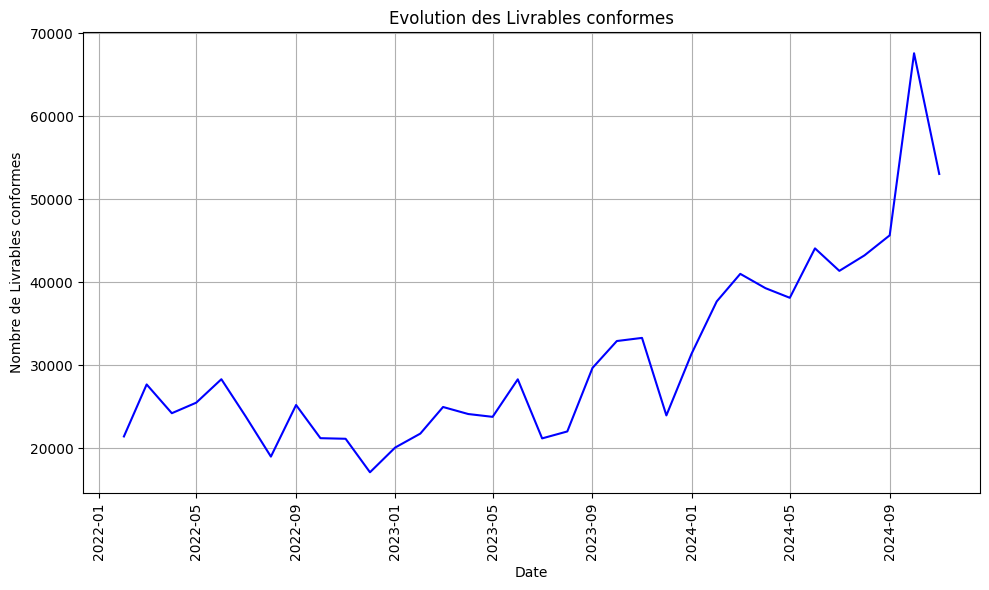

In [482]:
plt.figure(figsize=(10, 6))
plt.plot(df_grouped.index, df_grouped['Livrables conformes'], color='blue')
plt.title('Evolution des Livrables conformes')
plt.xlabel('Date')
plt.ylabel('Nombre de Livrables conformes')
plt.grid()

# Rotation des labels de l'axe X
plt.xticks(rotation=90)

plt.tight_layout()  # Ajuste automatiquement les éléments pour éviter les chevauchements
plt.show()

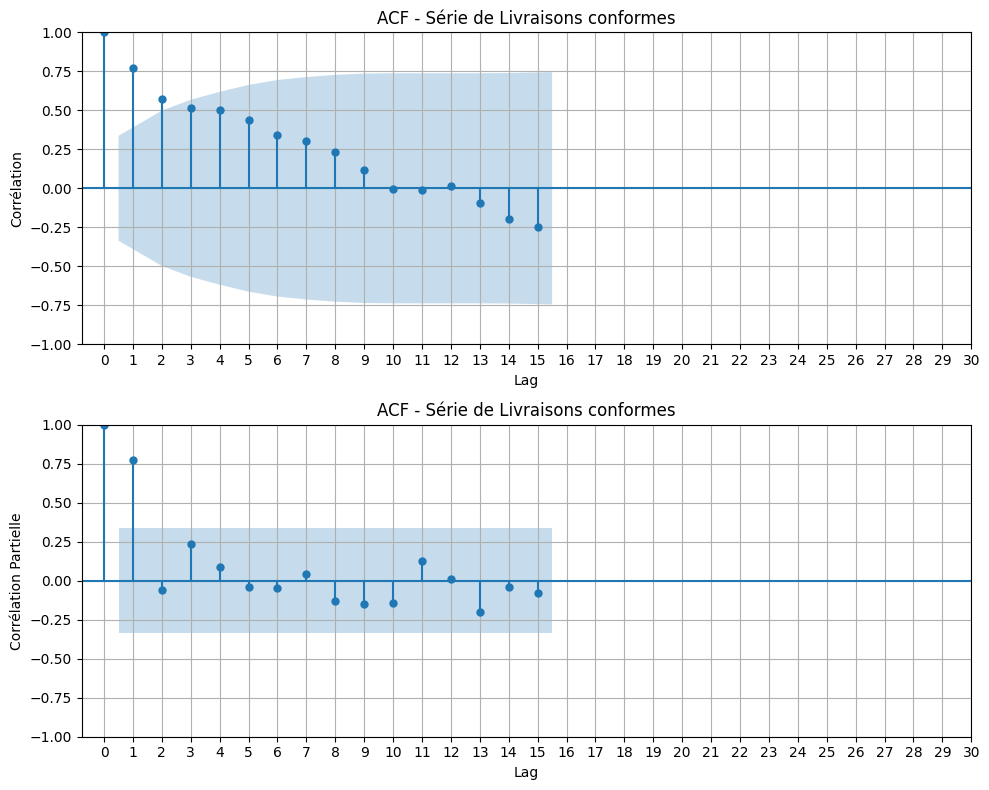

In [483]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1,ax2) = plt.subplots(2,1, figsize=(10,8))

#tracer l'ACF 
plot_acf(df_grouped['Livrables conformes'], lags=15, zero=True, ax=ax1)
ax1.set_title('ACF - Série de Livraisons conformes')

ax1.set_xlabel('Lag')
ax1.set_ylabel('Corrélation')
ax1.grid(True)

#ajuster les graduations sur l'axe x pour l'ACF
ax1.set_xticks(np.arange(0, 31, 1))

#tracer le PACF 
plot_pacf(df_grouped['Livrables conformes'], lags=15, zero=True, ax=ax2)
ax2.set_title('ACF - Série de Livraisons conformes')
ax2.set_xlabel('Lag')
ax2.set_ylabel('Corrélation Partielle')
ax2.grid(True)

#ajuster les graduations sur l'axe x pour le PACF
ax2.set_xticks(np.arange(0, 31, 1))

# Ajuster les subplots
plt.tight_layout()

plt.show()

In [484]:
#analyse de la stationnarité de la variable

from statsmodels.tsa.stattools import adfuller
from tabulate import tabulate

#Effectuer le test de Dickey-fuller augmenter
result = adfuller(df_grouped['Livrables conformes'])

#formater les résultats dans un tableau
table = [
    ['valeur de test', result[0]],
    ['P-valeur', result[1]],
    ['Conclusion', 'La sére est stationnaire' if result[1] < 0.05 else 'La série est non stationnaire']
]

#Afficher les résultats sous forme de tableau
print(tabulate(table, headers=['Métrique', 'Valeur'], tablefmt='github'))

| Métrique       | Valeur                        |
|----------------|-------------------------------|
| valeur de test | 0.6491435475057122            |
| P-valeur       | 0.9887663324673425            |
| Conclusion     | La série est non stationnaire |


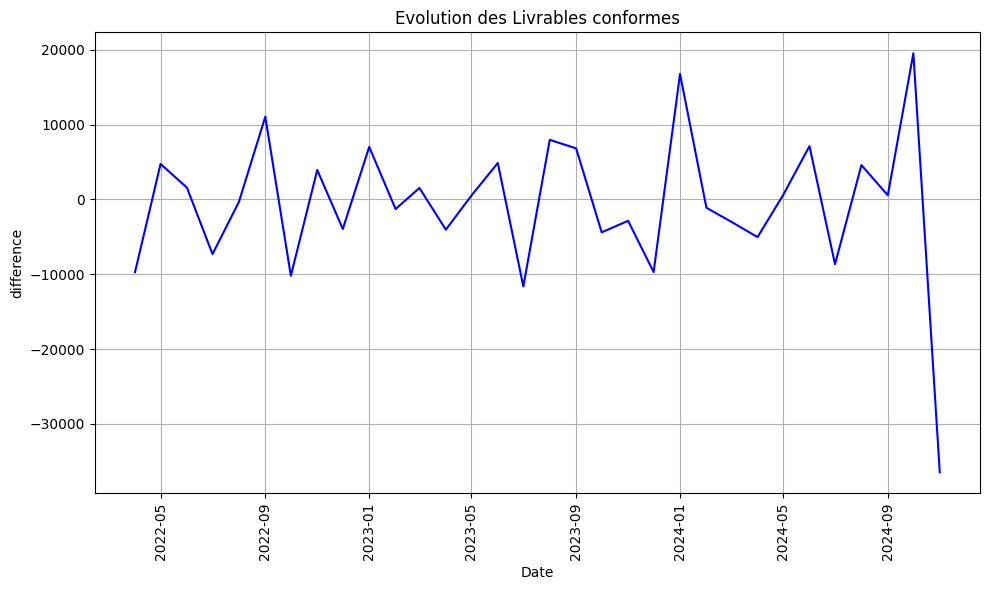

In [485]:
difference = df_grouped['Livrables conformes'].diff().diff().dropna()

plt.figure(figsize=(10, 6))
plt.plot(difference, color='blue')
plt.title('Evolution des Livrables conformes')
plt.xlabel('Date')
plt.ylabel('difference')
plt.grid()

# Rotation des labels de l'axe X
plt.xticks(rotation=90)

plt.tight_layout()  # Ajuste automatiquement les éléments pour éviter les chevauchements
plt.show()

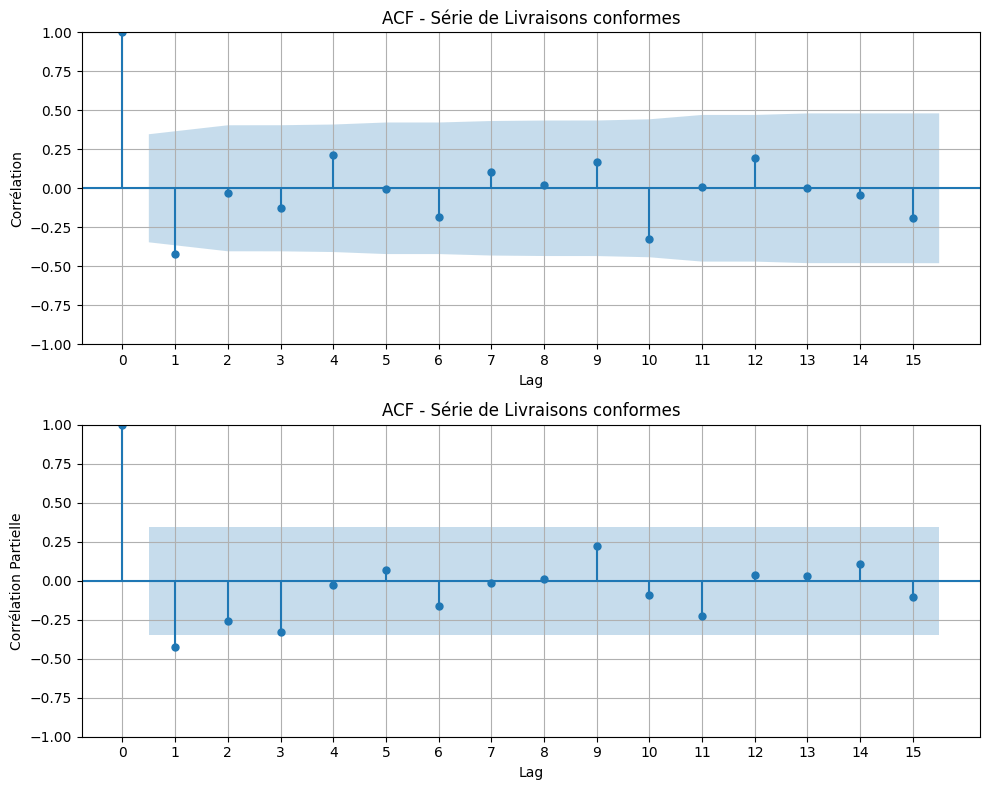

In [486]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1,ax2) = plt.subplots(2,1, figsize=(10,8))

#tracer l'ACF 
plot_acf(difference, lags=15, zero=True, ax=ax1)
ax1.set_title('ACF - Série de Livraisons conformes')

ax1.set_xlabel('Lag')
ax1.set_ylabel('Corrélation')
ax1.grid(True)

#ajuster les graduations sur l'axe x pour l'ACF
ax1.set_xticks(np.arange(0, 16, 1))

#tracer le PACF 
plot_pacf(difference, lags=15, zero=True, ax=ax2)
ax2.set_title('ACF - Série de Livraisons conformes')
ax2.set_xlabel('Lag')
ax2.set_ylabel('Corrélation Partielle')
ax2.grid(True)

#ajuster les graduations sur l'axe x pour le PACF
ax2.set_xticks(np.arange(0, 16, 1))

# Ajuster les subplots
plt.tight_layout()

plt.show()

In [487]:
#analyse de la stationnarité de la variable

from statsmodels.tsa.stattools import adfuller
from tabulate import tabulate

#Effectuer le test de Dickey-fuller augmenter
result = adfuller(difference)

#formater les résultats dans un tableau
table = [
    ['valeur de test', result[0]],
    ['P-valeur', result[1]],
    ['Conclusion', 'La sére est stationnaire' if result[1] < 0.05 else 'La série est non stationnaire']
]

#Afficher les résultats sous forme de tableau
print(tabulate(table, headers=['Métrique', 'Valeur'], tablefmt='github'))

| Métrique       | Valeur                        |
|----------------|-------------------------------|
| valeur de test | -2.2950065277164273           |
| P-valeur       | 0.17358352385707726           |
| Conclusion     | La série est non stationnaire |


In [488]:
p = 5
q = 1
d = 0

In [489]:
train_data = difference[:-15]
test_data = difference[-15:]

In [490]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train_data, order=(5,1,0))

model_fit = model.fit()

print(model_fit.summary())

                                SARIMAX Results                                
Dep. Variable:     Livrables conformes   No. Observations:                   17
Model:                  ARIMA(5, 1, 0)   Log Likelihood                -158.208
Date:                 Thu, 23 Jan 2025   AIC                            328.415
Time:                         15:00:53   BIC                            333.051
Sample:                     04-01-2022   HQIC                           328.653
                          - 08-01-2023                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.8308      0.425     -4.309      0.000      -2.663      -0.998
ar.L2         -2.0625      0.833     -2.476      0.013      -3.695      -0.430
ar.L3         -1.5691      0.879     -1.786 

<Figure size 1000x500 with 0 Axes>

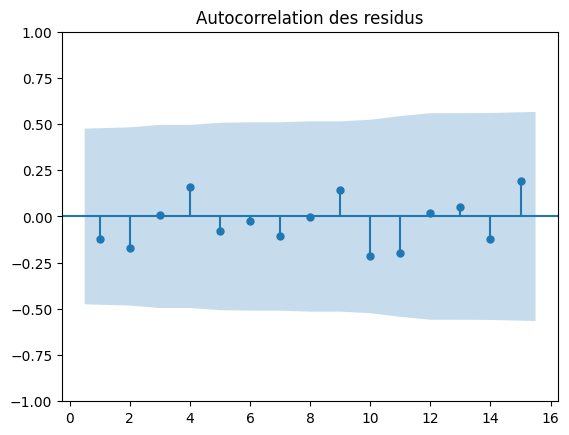

<Figure size 1000x500 with 0 Axes>

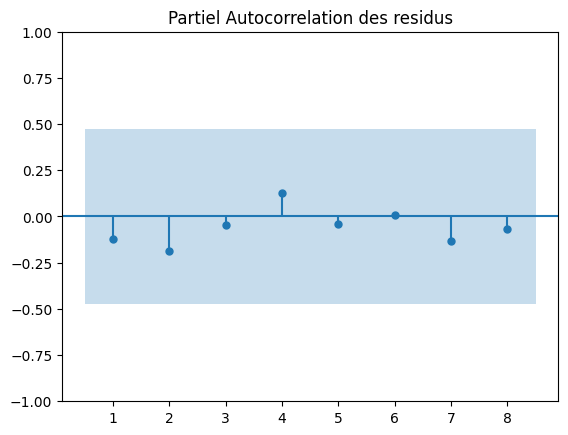

In [491]:
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import seaborn as sns

#Calculer les résidus
residuals = model_fit.resid

plt.figure(figsize=(10,5))
plot_acf(residuals, lags=15, zero=False)
plt.title("Autocorrelation des residus")
plt.show()

plt.figure(figsize=(10,5))
plot_pacf(residuals, lags=8, zero=False)
plt.title("Partiel Autocorrelation des residus")
plt.show()


datetime64[ns]
datetime64[ns]


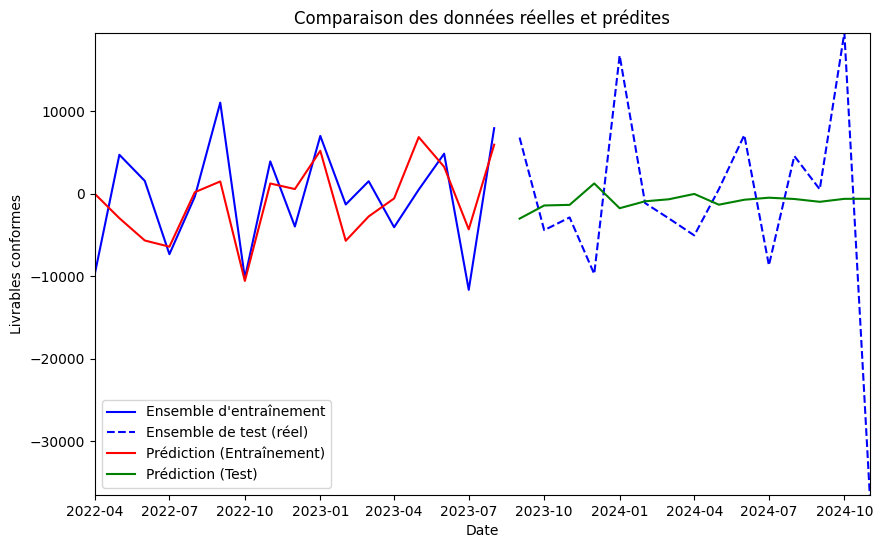

In [492]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#prediction sur l'ensemble d'entrainement
train_prediction = model_fit.predict(start=train_data.index[0], end=train_data.index[-1])

#prediction sur l'ensemble de test
test_prediction = model_fit.predict(start=test_data.index[0], end=test_data.index[-1])

#prediction sur l'ensemble d'entrainement
train_prediction = model_fit.predict(start=train_data.index[0], end=train_data.index[-1])

#prediction sur l'ensemble de test
test_prediction = model_fit.predict(start=test_data.index[0], end=test_data.index[-1])

print(train_prediction.index.dtype)
print(test_prediction.index.dtype)

# Conversion explicite en séries Pandas
train_prediction = pd.Series(train_prediction, index=train_data.index)
test_prediction = pd.Series(test_prediction, index=test_data.index)

# Tracer les courbes
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data.values, label="Ensemble d'entraînement", color="blue")
plt.plot(test_data.index, test_data.values, label="Ensemble de test (réel)", color="blue", linestyle="--")
plt.plot(train_prediction.index, train_prediction, label="Prédiction (Entraînement)", color="red")
plt.plot(test_prediction.index, test_prediction, label="Prédiction (Test)", color="green")

# Définir les limites des axes pour une continuité visuelle
plt.xlim(train_data.index[0], test_data.index[-1])
plt.ylim(min(train_data.min(), test_data.min()), max(train_data.max(), test_data.max()))

# Ajouter des labels et une légende
plt.xlabel("Date")
plt.ylabel("Livrables conformes")
plt.title("Comparaison des données réelles et prédites")
plt.legend()
plt.show()

In [493]:
#Mesure de performence sur l'ensemble d'entrainement
train_mae = mean_absolute_error(train_data, train_prediction)
train_mse = mean_squared_error(train_data, train_prediction)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(train_data, train_prediction)

#Mesure de performance sur l'ensemble de test
test_mae = mean_absolute_error(test_data, test_prediction)
test_mse = mean_squared_error(test_data, test_prediction)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(test_data, test_prediction)

#Créer un DataFrame pour afficher les mesures de performance
performance_df = pd.DataFrame({
    'Métrique' : ['MAE', 'MSE', 'RMSE', 'R2'],
    'Ensemble d\'entrainement' : [train_mae, train_mse, train_rmse, train_r2],
    'Ensemble de test' : [test_mae, test_mse, test_rmse, test_r2]
})

print(performance_df)


  Métrique  Ensemble d'entrainement  Ensemble de test
0      MAE             4.378719e+03      8.801474e+03
1      MSE             2.823002e+07      1.636635e+08
2     RMSE             5.313193e+03      1.279310e+04
3       R2             3.345727e-01     -5.444864e-02


In [494]:
import pmdarima as pm

#Séparer les données en ensemble d'entrainement et ensemble de test
train_data = df['Livrables conformes'][:-10]
test_data = df['Livrables conformes'][-10:]

#model auto_arima pour trouver le meilleur modèle ARIMA
model = pm.auto_arima(train_data)

print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4242
Model:               SARIMAX(5, 1, 0)   Log Likelihood              -34429.381
Date:                Thu, 23 Jan 2025   AIC                          68870.762
Time:                        15:01:02   BIC                          68908.877
Sample:                             0   HQIC                         68884.233
                               - 4242                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8053      0.008    -99.321      0.000      -0.821      -0.789
ar.L2         -0.6370      0.011    -57.614      0.000      -0.659      -0.615
ar.L3         -0.4680      0.012    -38.205      0.0

<Figure size 1000x500 with 0 Axes>

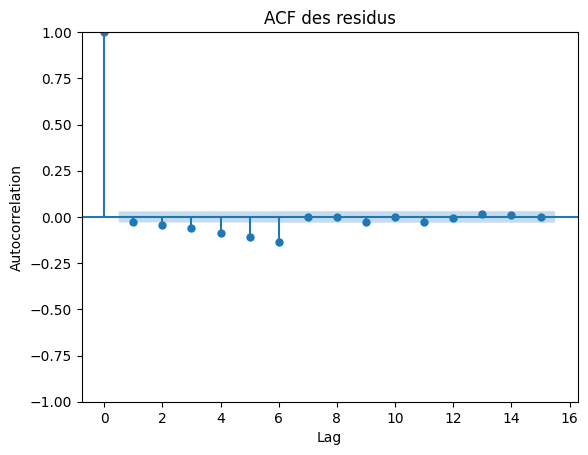

<Figure size 1000x500 with 0 Axes>

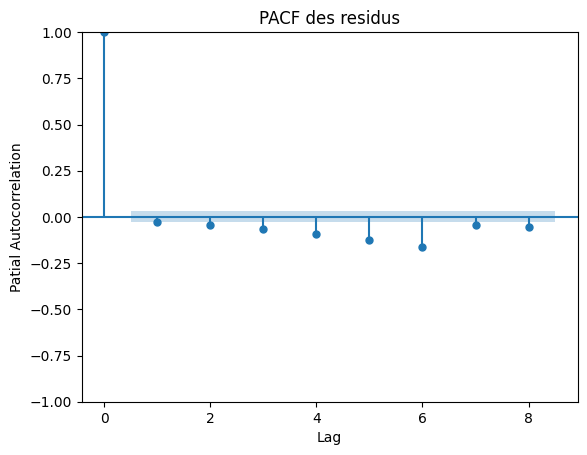

In [495]:
#Ajuster le modèle aux données
model.fit(train_data)

#obtenir les résidus du modeèle
residuals = model.resid()

plt.figure(figsize=(10,5))
plot_acf(residuals, lags=15)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title("ACF des residus")
plt.show()

plt.figure(figsize=(10,5))
plot_pacf(residuals, lags=8)
plt.xlabel('Lag')
plt.ylabel('Patial Autocorrelation')
plt.title("PACF des residus")
plt.show()

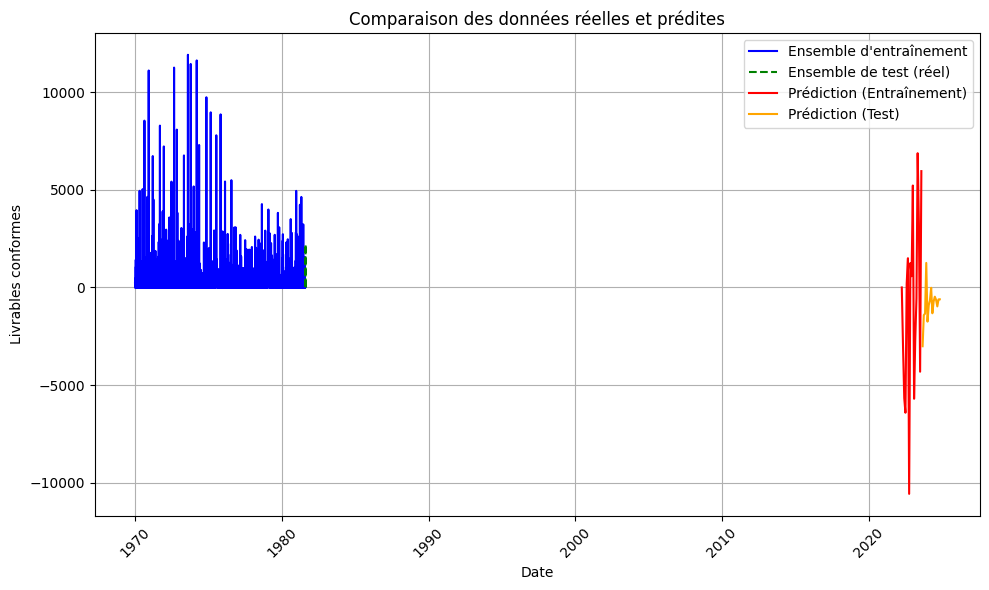

In [496]:
# Faire des prédictions sur l'ensemble d'entrainement
train_pred, train_confint = model.predict_in_sample(return_conf_int=True)

#Faire des prédiction sur l'ensemble de test
n_periods = len(test_data)
predicted, confint = model.predict(n_periods=n_periods, return_conf_int=True)

#Concaténer les prédictions pour l'ensemble d'entrainement et de test
all_prediction = pd.concat([pd.Series(train_pred,index=train_data.index),
                           pd.Series(predicted, index=test_data.index)],
                           axis=0)


plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data.values, label="Ensemble d'entraînement", color="blue")
plt.plot(test_data.index, test_data.values, label="Ensemble de test (réel)", color="green", linestyle="--")
plt.plot(train_prediction.index, train_prediction, label="Prédiction (Entraînement)", color="red")
plt.plot(test_prediction.index, test_prediction, label="Prédiction (Test)", color="orange")

plt.xlabel("Date")
plt.ylabel("Livrables conformes")
plt.title("Comparaison des données réelles et prédites")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [497]:


df.set_index('Mois', inplace=True)
print(df.index)

df_grouped = df.groupby('Mois').sum()  # Assurez-vous que l'agrégation se fait bien

print(df_grouped.head())
print(df_grouped.index)

print("Train Data:", train_data.index.min(), "-", train_data.index.max())
print("Test Data:", test_data.index.min(), "-", test_data.index.max())
print("Train Predictions:", train_prediction.index.min(), "-", train_prediction.index.max())
print("Test Predictions:", test_prediction.index.min(), "-", test_prediction.index.max())

DatetimeIndex(['2024-01-01', '2024-01-01', '2024-01-01', '2024-01-01',
               '2024-01-01', '2024-01-01', '2024-01-01', '2024-01-01',
               '2024-01-01', '2024-01-01',
               ...
               '2023-12-01', '2023-12-01', '2023-12-01', '2023-12-01',
               '2023-12-01', '2023-12-01', '2023-12-01', '2023-12-01',
               '2023-12-01', '2023-12-01'],
              dtype='datetime64[ns]', name='Mois', length=4252, freq=None)
            Livrables conformes  Livrables dans la tolérance  \
Mois                                                           
2022-02-01                21439                            0   
2022-03-01                27703                            6   
2022-04-01                24238                            7   
2022-05-01                25504                            0   
2022-06-01                28332                            0   

            Livrables non-conformes  
Mois                                 
2022-02-01

In [498]:
print("Train Data:")
print(train_data.head())
print("Test Data:")
print(test_data.head())

Train Data:
0    225
1      6
2      4
3    233
4      1
Name: Livrables conformes, dtype: int64
Test Data:
4242       1
4243       3
4244    2206
4245       6
4246      10
Name: Livrables conformes, dtype: int64


In [499]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Prédictions sur l'ensemble d'entraînement
train_prediction = model_fit.predict(start=0, end=len(train_data) - 1)

# Prédictions sur l'ensemble de test
test_prediction = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)


print(train_prediction.index.dtype)
print(test_prediction.index.dtype)

# Réassigner les indices aux prédictions
train_prediction = pd.Series(train_prediction, index=train_data.index)
test_prediction = pd.Series(test_prediction, index=test_data.index)

# Traçage des résultats
plt.figure(figsize=(10, 6))
plt.plot(train_data, label="Données d'entraînement", color="blue")
plt.plot(test_data, label="Données de test (réelles)", color="green", linestyle="--")
plt.plot(train_prediction, label="Prédiction (entraînement)", color="red")
plt.plot(test_prediction, label="Prédiction (test)", color="orange")

plt.xlabel("Date" if isinstance(train_data.index[0], pd.Timestamp) else "Index")
plt.ylabel("Valeur")
plt.title("Comparaison des données réelles et prédites")
plt.legend()
plt.show()

OutOfBoundsDatetime: Out of bounds timestamp: 2375-09-01 00:00:00 with frequency 'ns'

In [369]:
print("Taille des données d'entraînement :", len(train_data))

Taille des données d'entraînement : 4237
